### Dataset

- [Lamb et al. (2020)](https://zenodo.org/record/4031646#.X822jXUzZH5) (Global Whole Lithosphere Isostasy datasets)

- [EMC-CAM2016](http://ds.iris.edu/ds/products/emc-cam2016/) (Global upper mantle surface wave tomography model)(Priestley et al., 2013, 2019)

- [CRUST1.0](https://igppweb.ucsd.edu/~gabi/crust1.html) (A New Global Crustal Model at 1x1 Degrees) (Laske et al., 2013)

- [ETOPO5](https://www.ngdc.noaa.gov/mgg/global/) (5 arc-minute global relief model of Earth's surface) [[Download]](https://www.eea.europa.eu/data-and-maps/data/world-digital-elevation-model-etopo5)


- [age.3.6](https://www.ngdc.noaa.gov/mgg/ocean_age/data/2008/grids/age/) (Age, spreading rates and spreading asymmetry of the world's ocean crust)(Muller et al., 2008) 

- [Litho1.0](https://igppweb.ucsd.edu/~gabi/litho1.0.html) (Global model of lithospheric properties that builds upon Crust 1.0)(Pasyanos et al., 2014)

### Package

- [stripy](https://github.com/underworldcode/stripy) (A Python interface to TRIPACK and STRIPACK Fortran code for (constrained) triangulation in Cartesian coordinates and on a sphere)

- [litho1pt0](https://github.com/underworldcode/litho1pt0) (A Python interface to the crust 1.0 dataset and the lithospheric part of the litho 1.0 dataset)

- [pyshtools](https://shtools.github.io/SHTOOLS/index.html)(An archive of Python spherical harmonic tools)(Mark et al., 2018)

### Reference:
- Lamb, S., Moore, J. D., Perez‐Gussinye, M., & Stern, T. Global whole lithosphere isostasy: implications for surface elevations, structure, strength and densities of the continental lithosphere. Geochemistry, Geophysics, Geosystems, e2020GC009150.
- Laske, G., Masters., G., Ma, Z. and Pasyanos, M., Update on CRUST1.0 - A 1-degree Global Model of Earth's Crust, Geophys. Res. Abstracts, 15, Abstract EGU2013-2658, 2013.
- Priestley, K., and D. McKenzie (2013), The relationship between shear wave velocity, temperature, attenuation and viscosity in the shallow part of the mantle, Earth and Planetary Science Letters, 381, 78–91. https://doi.org/10.1016/j.epsl.2013.08.022
- Priestley, K. , McKenzie, D. and Ho, T. (2019). A Lithosphere–Asthenosphere Boundary—a Global Model Derived from Multimode Surface‐Wave Tomography and Petrology. In Lithospheric Discontinuities (eds H. Yuan and B. Romanowicz). https://doi.org/10.1002/9781119249740.ch6
 
- Pasyanos, M. E., Masters, T. G., Laske, G., & Ma, Z. (2014). LITHO1. 0: An updated crust and lithospheric model of the Earth. Journal of Geophysical Research: Solid Earth, 119(3), 2153-2173.
- Mark A. Wieczorek and Matthias Meschede (2018). SHTools — Tools for working with spherical harmonics, Geochemistry, Geophysics, Geosystems, 19, 2574-2592, doi:10.1029/2018GC007529.
- Moresi, L. and Mather, B.R., (2019). Stripy: A Python module for (constrained) triangulation in Cartesian coordinates and on a sphere.. Journal of Open Source Software, 4(38), 1410, https://doi.org/10.21105/joss.01410
- Muller, R. D., M. Sdrolias, C. Gaina, and W. R. Roest (2008), Age, spreading rates, and spreading asymmetry of the world's ocean crust, Geochem. Geophys. Geosyst., 9, Q04006, doi:10.1029/2007GC001743.

In [1]:
import numpy as np
import litho1pt0 as litho
import stripy
import os
import xarray
import pyshtools as pysh
from scipy import ndimage
import pygmt

import sys 
sys.path.append("..") 
from ezgeopy import litho1pt0_dlc as litho_dlc
from ezgeopy import datafn as fn

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
outputfile = "Output_1_01_01_WLI(Lamb2020)_FromCitedData/"
outputPath = os.path.join(os.path.abspath("."),outputfile) 
if not os.path.exists(outputPath):
    os.makedirs(outputPath)

In [3]:
# parameters for cartopy
rivers    = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m',edgecolor='Blue', facecolor="none")
coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '110m',edgecolor=(0.0,0.0,0.0),facecolor="none")
prj_base  = ccrs.PlateCarree()

# parameters for plot
xticks_global = np.arange(-180,180+10,60)
yticks_global = np.arange(-90,90+10,30)
xticks_area = np.arange(-180,180+5,5)
yticks_area = np.arange(-90,90+5,5)
dpi = 150

In [4]:
def plot_map(data,extent_img,extent_fig,cmap,vmin,vmax,unit,figname):
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    ax = plt.axes(projection=prj_base)
    ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=figname)
    ax.set_extent(extent_fig)
    ax.set()
    #ax.set_global()
    m=ax.imshow(data, origin='lower',cmap=cmap,vmin=vmin,vmax=vmax,extent=extent_img, transform=prj_base)
    cbr = plt.colorbar(mappable=m, orientation='horizontal',pad=0.12,shrink=0.8, aspect=50)
    cbr.set_label(unit)
    ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
    plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

### 1.  Result from the paper

Difference between observed elevation and that predicted by whole lithosphere isostasy from Lamb2020 (Fig.8 in Lamb2020)

In [5]:
# ! gmt grd2xyz ds03.grd > ds03.xyz

fname = "../Data/Lamb2020/ds03.xyz"
dlon_dtopo,dlat_dtopo = 1,1
data_dtopo_base,extent_dtopo = fn.loadxyz2grd(fname,"lonlat",dlon_dtopo,dlat_dtopo)

extent_base = extent_dtopo
dlon_base,dlat_base = dlon_dtopo,dlat_dtopo
shape_base = data_dtopo_base.shape

minlon,maxlon,minlat,maxlat = extent_base
nlon = shape_base[1]
nlat = shape_base[0]
size = nlon*nlat

lons_base = np.linspace(minlon,maxlon,nlon)
lats_base = np.linspace(minlat,maxlat,nlat)
lonv_base, latv_base = np.meshgrid(lons_base, lats_base, indexing='xy')

/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)


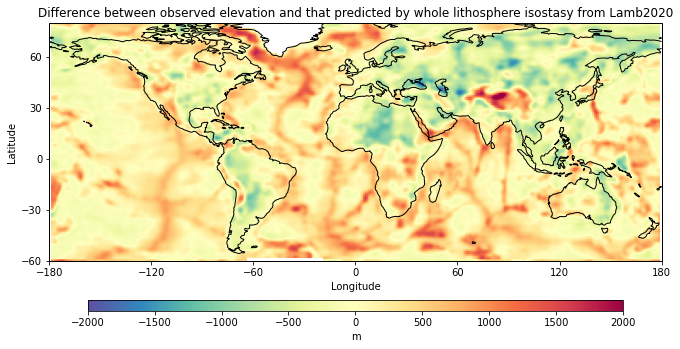

In [6]:
# Fig.8 in Lamb2020
figname = "Difference between observed elevation and that predicted by whole lithosphere isostasy from Lamb2020"
plot_map(data_dtopo_base,extent_base,extent_base,cm.Spectral_r,-2000,2000,"m",figname)

### 2. Calculation

The whole lithosphere isostasy is calculated by (Lamb2020): 
$\Delta H = \Delta C/ \alpha - \Delta L /\beta$

Where, 

$\Delta H $ surface elevation above sea level

$\Delta C$ changes in crust thickness

$\Delta L$ changes in lithospheric thickness

$\alpha = \rho_a/(\rho_m-\rho_c)$

$\beta  = \rho_a/(\rho_m-\rho_a)$

This is calculated using the following parameters: 

(1) for elevations >−1,000 m α and β (7.8 and 93, respectively)

(2) for oceanic regions with elevations <−1,000, where α and β are 6.5 and 65, respectively; 

(3) a 32 kmreference crustal thickness for 100 km thick conductive lithosphere; 

(4) crustal thickness and elevations are those in the CRUST 1.0 and Etopo5 databases; 

(5) conductive lithosphere thicknesses are those from Priestley et al. (2019).

### 2.1 Surface topography/bathymetry and crustal thickness from Litho1.0

In [7]:
from osgeo import gdal
fname = "../Data/ETOPO5.tif"
gtiff = gdal.Open(fname)
width = gtiff.RasterXSize
height = gtiff.RasterYSize
gt = gtiff.GetGeoTransform()
img = np.flipud(gtiff.GetRasterBand(1).ReadAsArray())

minlon,maxlat = gt[0],gt[3]
dlon,dlat = gt[1], -gt[5]   #dlon,dlat = 5/60,5/60
nlon,nlat = img.shape[1],img.shape[0]
maxlon = minlon+dlon*nlon
minlat = maxlat-dlat*nlat
extent = (minlon,maxlon,minlat,maxlat)

extent_topo0 = extent # (-180,180-5/60,-90+5/60,90) #extent
dlon_topo0,dlat_topo0 = dlon,dlat
data_topo0 = img

# Method1: directly from closet_grid
data_topo2 = fn.get_closest_grid(extent_topo0,dlon_topo0,dlat_topo0,data_topo0,extent_base,dlon_base,dlat_base)

## Method2: using shtool
grid0 = pysh.SHGrid.from_array(data_topo0)
clm = grid0.expand()

lmax0 = int((180/(dlon_base)-2)/2)
shc = clm.expand(grid='DH2',lmax=lmax0,extend=False)
coeffs = pysh.expand.SHExpandDH(shc.data, sampling=2)
grid = pysh.expand.MakeGridDH(coeffs, sampling=2) 

extent_topo=(shc.lons().min()-180,shc.lons().max()-180,shc.lats().min(),shc.lats().max())
data_topo = fn.get_closest_grid(extent_topo,dlon_base,dlat_base,grid.data,extent_base,dlon_base,dlat_base)

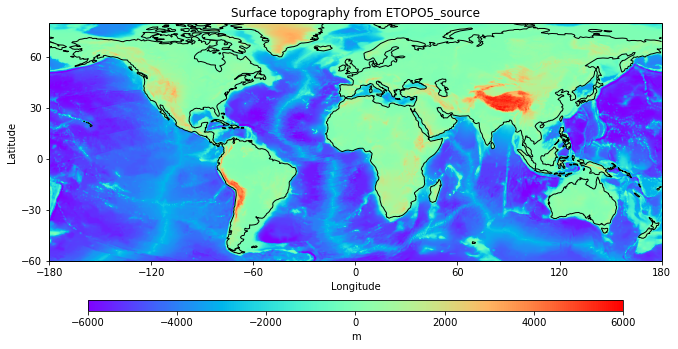

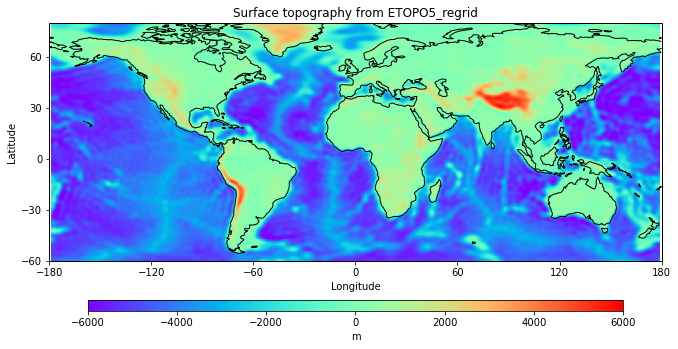

In [8]:
# Fig.2a in Lamb2020
figname = "Surface topography from ETOPO5_source"
plot_map(data_topo0,extent_topo0,extent_base,cm.rainbow,-6000,6000,"m",figname)

figname = "Surface topography from ETOPO5_regrid"
plot_map(data_topo,extent_base,extent_base,cm.rainbow,-6000,6000,"m",figname)

### 2.2 Crustal thickness from CRUST 1.0 (Laske et al., 2013)

In [9]:
fname = "../Data/crust1.0/crsthk.xyz"
dlon_ct0,dlat_ct0 = 1,1
data_ct0,extent_ct0 = fn.loadxyz2grd(fname,"lonlat",dlon_ct0,dlat_ct0)
data_ct = fn.interp2grid(extent_ct0,dlon_ct0,dlat_ct0,data_ct0,extent_base,dlon_base,dlat_base,order=3)

fname = "../Data/crust1.0/sedthk.xyz"
dlon_st0,dlat_st0 = 1,1
data_st0,extent_st0 = fn.loadxyz2grd(fname,"lonlat",dlon_st0,dlat_st0)
data_st = fn.interp2grid(extent_st0,dlon_st0,dlat_st0,data_st0,extent_base,dlon_base,dlat_base,order=3)

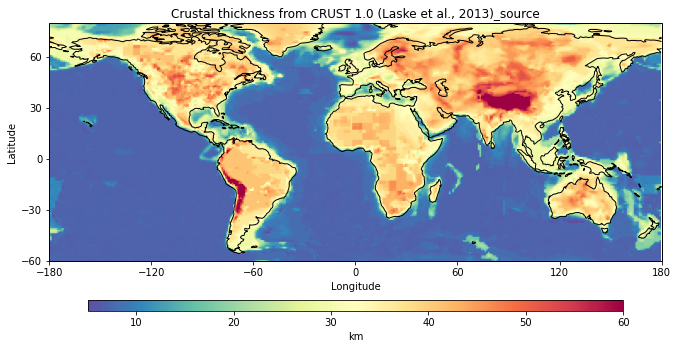

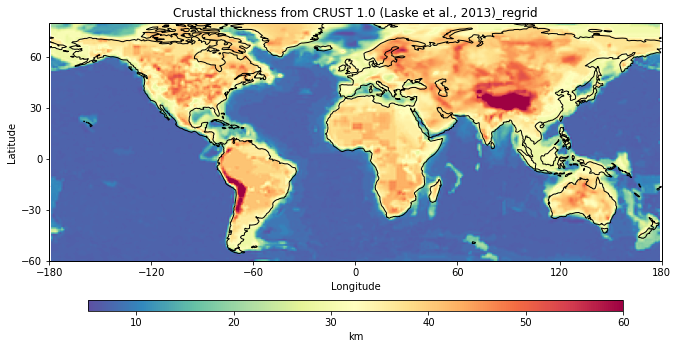

In [10]:
# Fig.2b in Lamb2020
figname="Crustal thickness from CRUST 1.0 (Laske et al., 2013)_source"
plot_map(data_ct0,extent_ct0,extent_base,cm.Spectral_r,5.,60.,"km",figname)

figname="Crustal thickness from CRUST 1.0 (Laske et al., 2013)_regrid"
plot_map(data_ct,extent_base,extent_base,cm.Spectral_r,5.,60.,"km",figname)

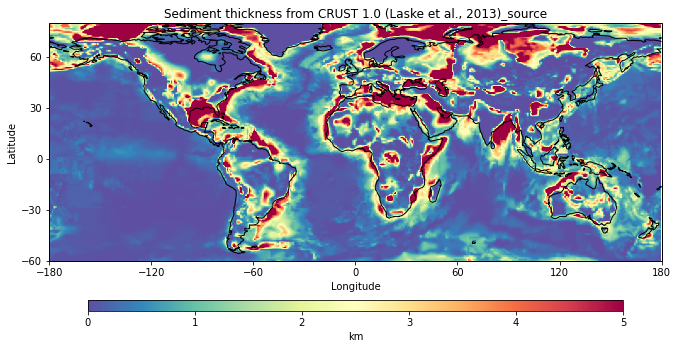

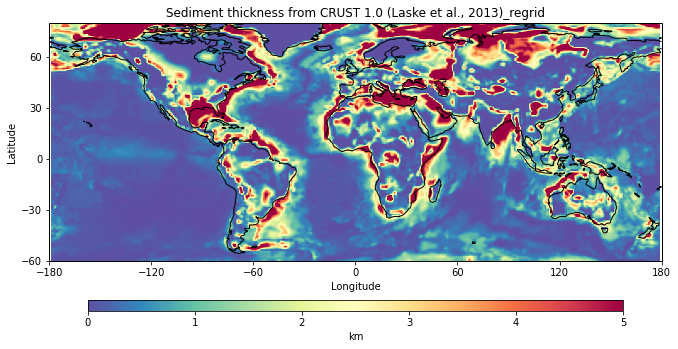

In [11]:
figname="Sediment thickness from CRUST 1.0 (Laske et al., 2013)_source"
plot_map(data_st0,extent_st0,extent_base,cm.Spectral_r,0.,5.,"km",figname)

figname="Sediment thickness from CRUST 1.0 (Laske et al., 2013)_regrid"
plot_map(data_st,extent_base,extent_base,cm.Spectral_r,0.,5.,"km",figname)

### 2.3 Conductive lithosphere thickness from Priestley2019

In [12]:
fname = "../Data/CAM2016/CAM2016Litho/CAM2016Litho"
dlon0,dlat0 = 2,2
data_clt0,extent_clt0 = fn.loadxyz2grd(fname,"latlon",dlon0,dlat0)
data_clt = fn.interp2grid(extent_clt0,dlon0,dlat0,data_clt0,extent_base,dlon_base,dlat_base,order=3)

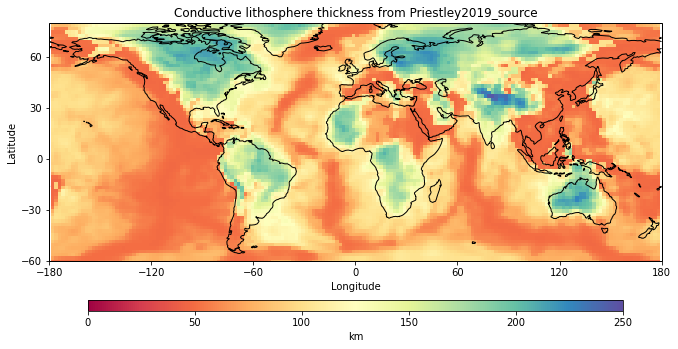

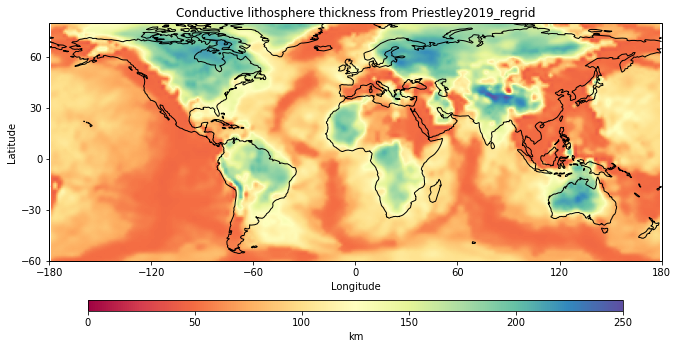

In [13]:
figname="Conductive lithosphere thickness from Priestley2019_source"
plot_map(data_clt0,extent_clt0,extent_base,cm.Spectral,0.,250.,"km",figname)

figname="Conductive lithosphere thickness from Priestley2019_regrid"
plot_map(data_clt,extent_base,extent_base,cm.Spectral,0.,250.,"km",figname)

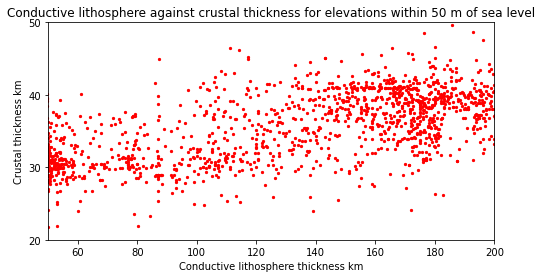

In [19]:
fname_fig = "Conductive lithosphere against crustal thickness for elevations within 50 m of sea level"
xticks = np.arange(40,220+5,20)
yticks = np.arange(20,50+5,10) 
extent_fig = ([50,200,20,50])

within_50m = np.abs(data_topo)<50.

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Conductive lithosphere thickness km', ylabel='Crustal thickness km',xticks=xticks,yticks=yticks,title=fname_fig)
plt.axis(extent_fig)
ax.scatter(data_clt[within_50m ].flatten(),data_ct[within_50m ].flatten(),s =5, color="red")
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

In [ ]:
xticks = np.arange(15,55+5,5)
yticks = np.arange(-3,3+0.5,1) 
extent_fig = ([15,55,-3,3])

# Fig3.(b) in Lamb2020
fname_fig = "Crustal thickness against elevation"
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Crustal thickness km', ylabel='elevation km',xticks=xticks,yticks=yticks,title=fname_fig)
plt.axis(extent_fig)
ax.scatter(data_ct.flatten(),data_topo.flatten()/1000,s =5, color="red")
ax.plot(data_ct.flatten(),(data_ct-32).flatten()/7.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

alpha_water =  3250./(3250.-1000.)

data_topo_ = data_topo.copy()
is_ocean = data_topo_< -1000
data_topo_[is_ocean]= data_topo_[is_ocean]/alpha_water
data_topo_reduced =  data_topo_/1000.+(data_clt-100)/93

# Fig3.(c) in Lamb2020
fname_fig = "Crustal thickness against reduced elevation"
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Crustal thickness km', ylabel='elevation km',xticks=xticks,yticks=yticks,title=fname_fig)
plt.axis(extent_fig)
ax.scatter(data_ct.flatten(),data_topo_reduced,s =5, color="red")
ax.plot(data_ct.flatten(),(data_ct-32).flatten()/7.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

### 2.4 Difference between observed elevation and that predicted by whole lithosphere isostasy

In [16]:
# cal the WLI (reference parameters from Lamb2020)
is_ocean = data_topo <= -1000.

# 1 for continet, 2 for ocean
alpha1,beta1 = 7.8,93
alpha2,beta2 = 6.5,65
rho_a = 3250.
rho_w= 1000.
alpha_water = rho_a/(rho_a-rho_w)
ref_c = 32
ref_l = 100

topo_cal1 = (data_ct+data_st-ref_c)/alpha1-(data_clt-ref_l)/beta1
topo_cal2 = ((data_ct+data_st-ref_c)/alpha2-(data_clt-ref_l)/beta2)*alpha_water

# topo_cal1 = (data_ct-ref_c)/alpha1-(data_clt-ref_l)/beta1
# topo_cal2 = ((data_ct-ref_c)/alpha2-(data_clt-ref_l)/beta2)*alpha_water

topo_cal = np.empty_like(topo_cal1)
topo_cal[~is_ocean] = topo_cal1[~is_ocean]
topo_cal[is_ocean]  = topo_cal2[is_ocean] 

data_dtopo = data_topo-topo_cal*1000

Correction

1. a correction for sedimentary basins, using thicknesses in Crust1.0 (for sediment thickness < 5 km, delta_rho = -0.2 g/cc; for sediment thickness 5 – 10 km, delta_rho = -0.1 g/cc). 

2. map is smoothed using a gaussian filter with 3 sigma = 500 km. Thus, this basically looks at topography on length scales of ~200 km, removing flexural effects.

In [17]:
df = xarray.DataArray(data=data_dtopo.astype(float),dims=["lat","lon"],
                      coords=dict(lon=lons_base,lat=lats_base),
                      attrs=dict(units="meters",vertical_datum="EMG96",horizontal_datum="WGS84"),)
data_dtopo_file = outputPath+ "data_dtopo.nc"
df.to_netcdf(data_dtopo_file)

#pygmt.grdinfo(df)
data_dtopof = pygmt.grdfilter(grid=data_dtopo_file , filter="g500", distance="3")

/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)


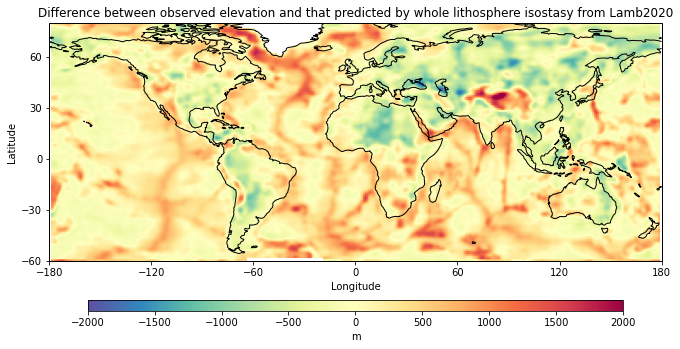

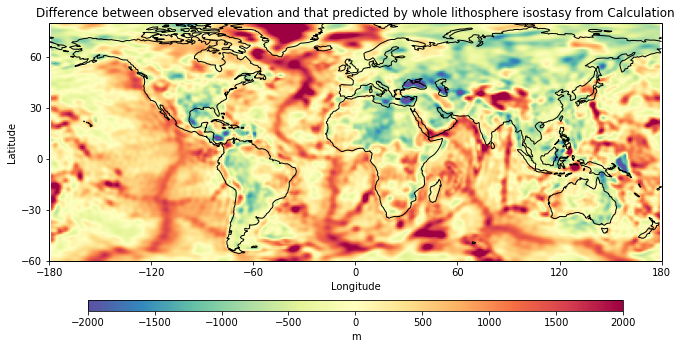

In [18]:
figname = "Difference between observed elevation and that predicted by whole lithosphere isostasy from Lamb2020"
plot_map(data_dtopo_base,extent_base,extent_base,cm.Spectral_r,-2000,2000,"m",figname)

figname = "Difference between observed elevation and that predicted by whole lithosphere isostasy from Calculation"
plot_map(data_dtopof,extent_base,extent_base,cm.Spectral_r,-2000,2000,"m",figname)